In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('encoded_car_data (1).csv')
print(df.head())

   diesel  gas  std  turbo  convertible  hardtop  hatchback  sedan  wagon  \
0     0.0  1.0  1.0    0.0          1.0      0.0        0.0    0.0    0.0   
1     0.0  1.0  1.0    0.0          1.0      0.0        0.0    0.0    0.0   
2     0.0  1.0  1.0    0.0          0.0      0.0        1.0    0.0    0.0   
3     0.0  1.0  1.0    0.0          0.0      0.0        0.0    1.0    0.0   
4     0.0  1.0  1.0    0.0          0.0      0.0        0.0    1.0    0.0   

   4wd  ...  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0  0.0  ...       88.6      2548.0       130.0       3.47       111.0   
1  0.0  ...       88.6      2548.0       130.0       3.47       111.0   
2  0.0  ...       94.5      2823.0       152.0       2.68       154.0   
3  0.0  ...       99.8      2337.0       109.0       3.19       102.0   
4  1.0  ...       99.4      2824.0       136.0       3.19       115.0   

   carlength  carwidth  citympg  highwaympg    price  
0      168.8      64.1     21.0        27.0

In [3]:
X=df[['enginesize','horsepower','citympg','highwaympg']]
Y=df['price']

In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [5]:
#1.linear regression(with scaling)
lr=Pipeline([
    ('scaler',StandardScaler()),
    ('model',LinearRegression())
])
lr.fit(X_train,Y_train)
Y_pred_linear=lr.predict(X_test)

In [6]:
#2.polynomial regression(degree=2)
poly_model=Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('scaler',StandardScaler()),
    ('model',LinearRegression())
])
poly_model.fit(X_train,Y_train)
Y_pred_poly=poly_model.predict(X_test)

In [7]:
#evaluate models
print('Name: Suwasthika V')
print('reg. No.: 212225040445')
print("Linear Regression:")
print("MSE=",mean_squared_error(Y_test,Y_pred_linear))
print('MAE=',mean_absolute_error(Y_test,Y_pred_linear))
print("R2 Score=",r2_score(Y_test,Y_pred_linear))

Name: Suwasthika V
reg. No.: 212225040445
Linear Regression:
MSE= 16471505.900042146
MAE= 2892.628134137953
R2 Score= 0.7913520781370976


In [8]:
print("\nPolynomial Regression:")
print("MSE=",mean_squared_error(Y_test,Y_pred_poly))
print('MAE=',mean_absolute_error(Y_test,Y_pred_poly))
print(f"R2 Score= {r2_score(Y_test,Y_pred_poly):.2f}")


Polynomial Regression:
MSE= 15247661.892213836
MAE= 2694.0456913330454
R2 Score= 0.81


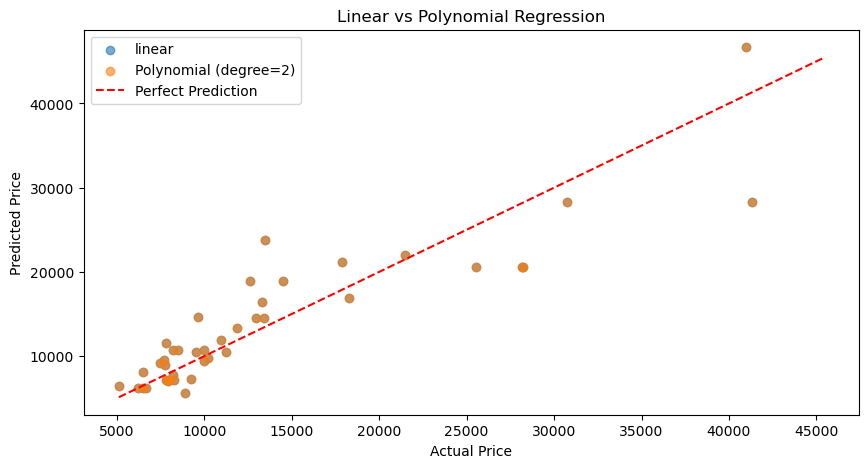

In [9]:
#plot actual vs predict
plt.figure(figsize=(10,5))
plt.scatter(Y_test,Y_pred_poly,label='linear',alpha=0.6)
plt.scatter(Y_test,Y_pred_poly,label='Polynomial (degree=2)',alpha=0.6)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()